# Student Academic Performance Analysis

# 1. Introduction
This data set consists of the marks secured by the students in various subjects. Let's try to understand the influence of the parents background, test preparation etc on students performance.

# 2. Loading libraries and data

In [2]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv(r"C:\Users\LENOVO\Downloads\Student Performance Indicator\StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# 3. Quick look at the data

In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# 4. Visualize missing values

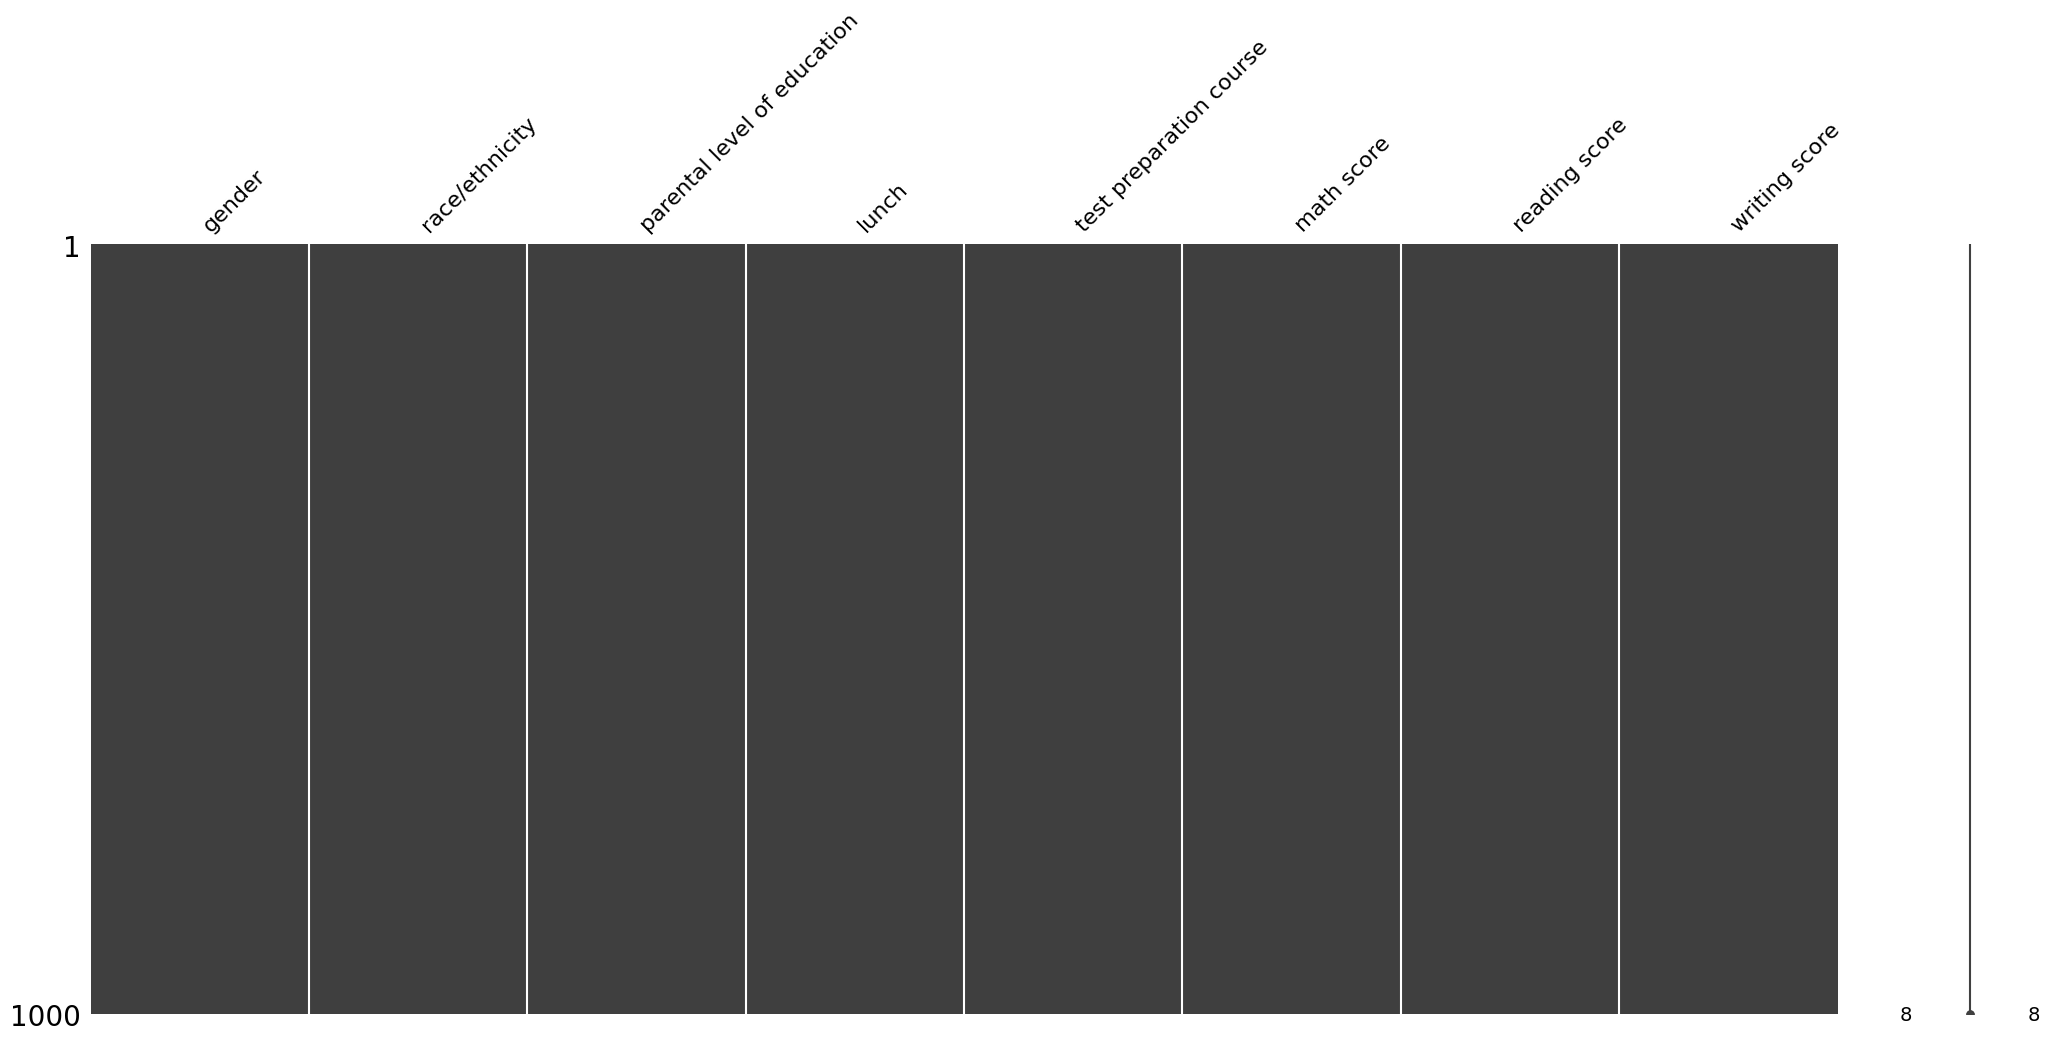

In [10]:
msno.matrix(df);

Using this matrix you can very quickly find the pattern of missingness in the dataset. From the above visualisation we can observe that no peculiar pattern can be found!

In [11]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 5. Data Prep

For a particular course, the total marks is 100. So let's set passmark has 40 marks

In [12]:
#initializing the passmarks
passmark=40

Let's create three new columns: Total_Marks, Percentage and grade

In [13]:
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

<a id = "10" ></a>
<center> <span style="font-family:serif; font-size:24px;"> Grading System </span> </center>

| Percentage Range | Grade | Qualification |
| --- | --- | --- |
| >= 95 | O | Outstanding |
| >= 81 | A | Very Good |
| >= 71 | B | Good |
| >= 61 | C | Average |
| >= 51 | D | Sufficient |
| >= 41 | E | Passable |
| < 41 | F | Fail |

<a id = "10" ></a>

In [14]:
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [15]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


In [16]:
df.describe()

,math score,reading score,writing score,Percentage
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,67.770667
std,15.16308,14.600192,15.195657,14.257326
min,0.00000,17.000000,10.000000,9.000000
25%,57.00000,59.000000,57.750000,58.333333
50%,66.00000,70.000000,69.000000,68.333333
75%,77.00000,79.000000,79.000000,77.666667
max,100.00000,100.000000,100.000000,100.000000


# 6. Data Visualization

In [17]:
sns.set(style='whitegrid')

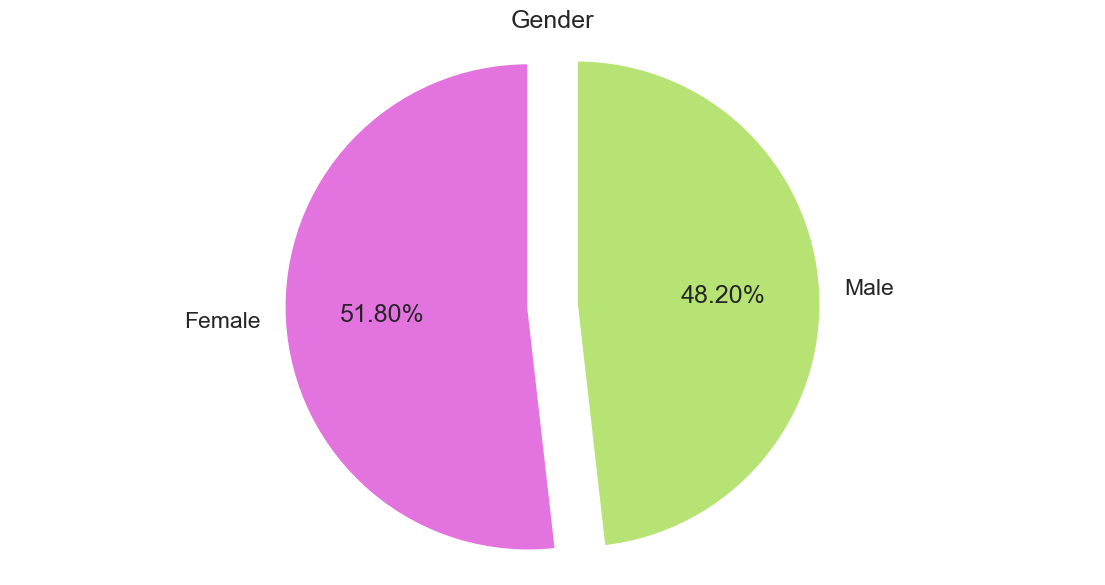

In [31]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['#e373df','#b6e373'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()

* Out of the total number of students, 51.89% are females while 48.20% are males.

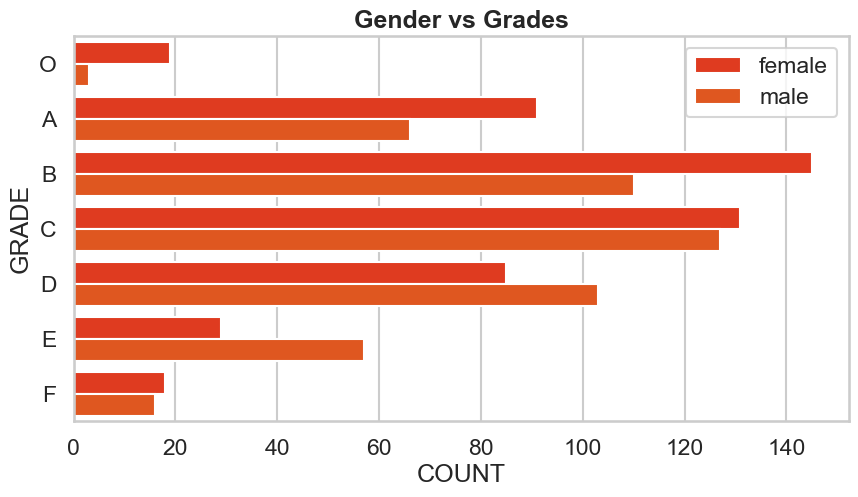

In [26]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("autumn")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["O","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()

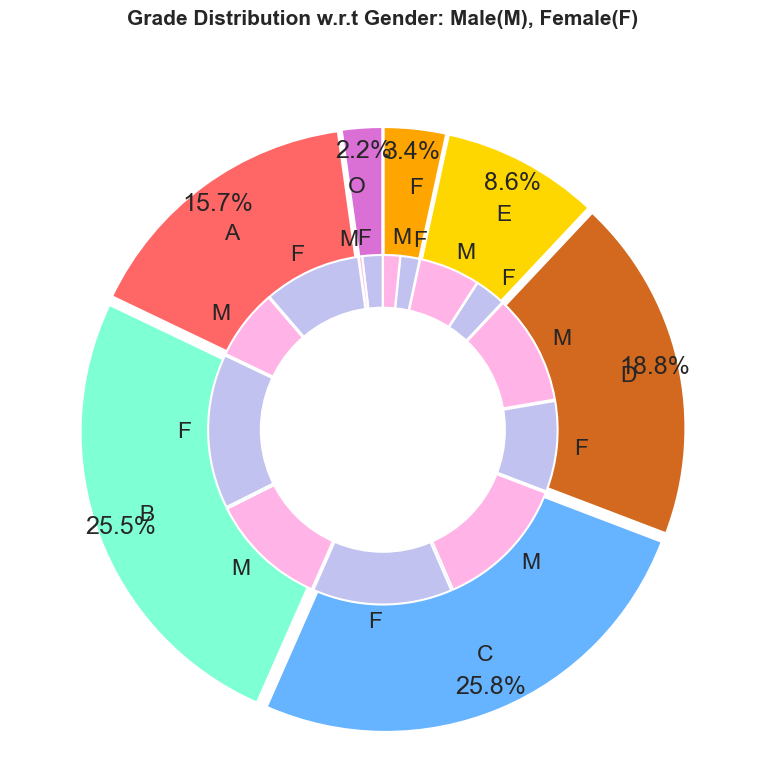

In [32]:
plt.figure(figsize=(8, 8))
labels =["O","A","B","C","D","E","F"]
values = [22,157,255,258,188,86,34]
labels_gender = ["F","M","F","M","F","M","F","M","F","M","F","M","F","M"]
sizes_gender = [19,3,91,66,145,110,131,127,85,103,29,57,18,16]
colors = ['orchid', '#ff6666', 'aquamarine', '#66b3ff','chocolate','gold','orange']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3,0.3,0.3,0.3,0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%' ,pctdistance=0.92, labeldistance=0.80,colors=colors, startangle=90,frame=True, explode=explode,radius=12)
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7)
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Grade Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, fontweight='bold',y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

From the above visualization we infer:

* The majority of students who earned an O grade were female.
* Majority of students received B grade followed by C.
* More female students received A and B Grade relative to male students.
* More number of boys received D and E grade.
* Almost similar number of both, male and female, got F grade.

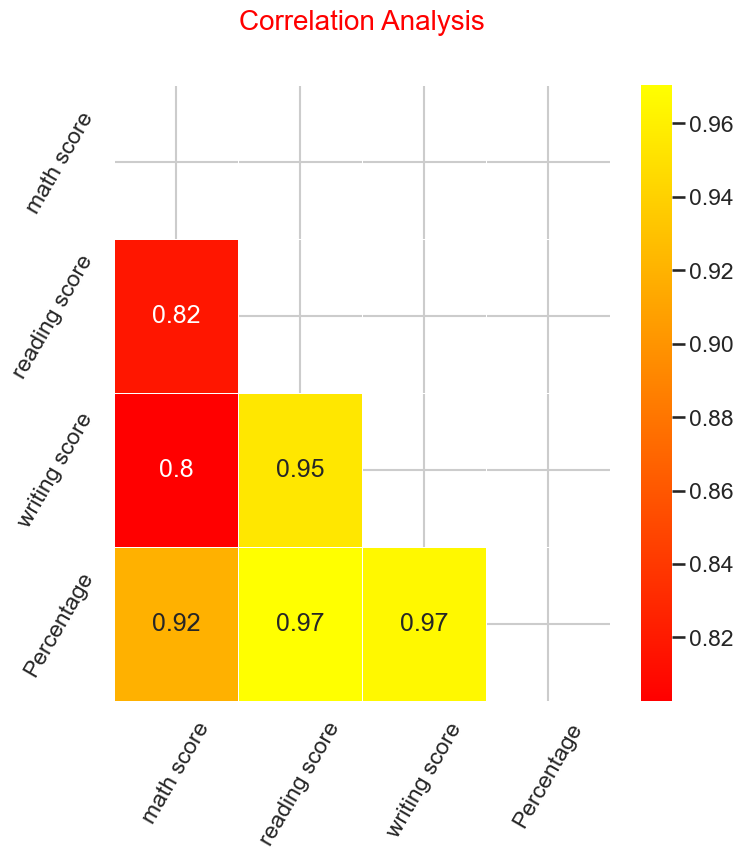

In [45]:
plt.figure(figsize=(8,8))
plt.title('Correlation Analysis',color='Red',fontsize=20,pad=40)

corr = df.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))
sns.heatmap(df.corr(),mask=mask,annot=True,linewidths=.5,cmap='autumn');
plt.xticks(rotation=60)
plt.yticks(rotation = 60)
plt.show()

* Almost all the scores are close to each other. There is average success in all three course.

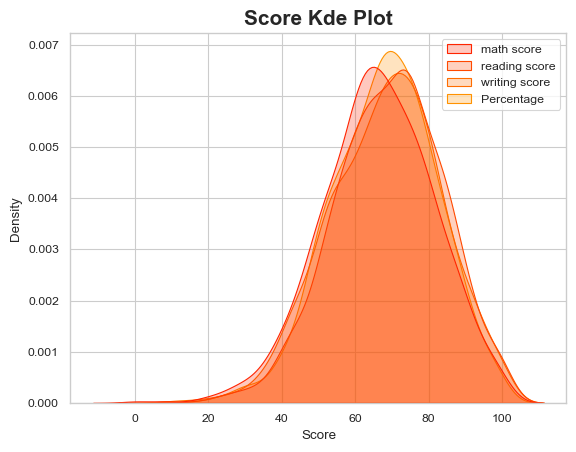

In [51]:
sns.set_context("paper",font_scale=1)
sns.kdeplot(data=df,shade = True)
plt.xlabel('Score')
plt.title('Score Kde Plot', fontsize=15, fontweight='bold')
plt.show()

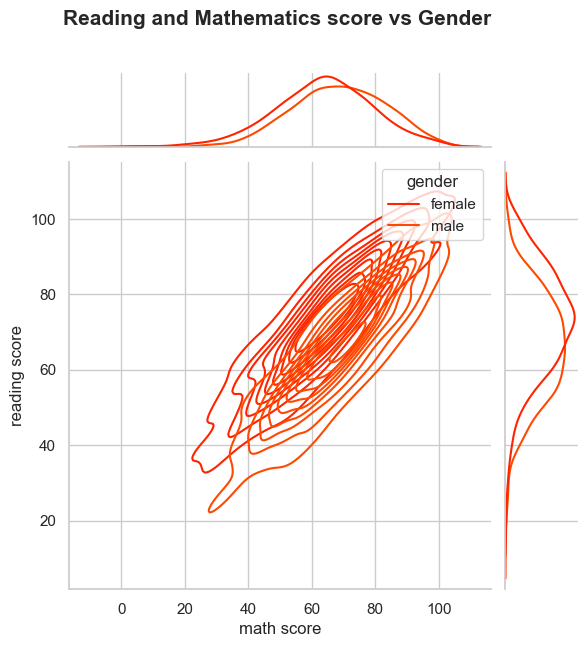

In [55]:
sns.set_context("notebook")
sns.jointplot(data=df, x="math score", y="reading score", hue="gender", kind="kde")
plt.title('Reading and Mathematics score vs Gender', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* We can see the relationship between reading and mathematical score and their gender distribution.

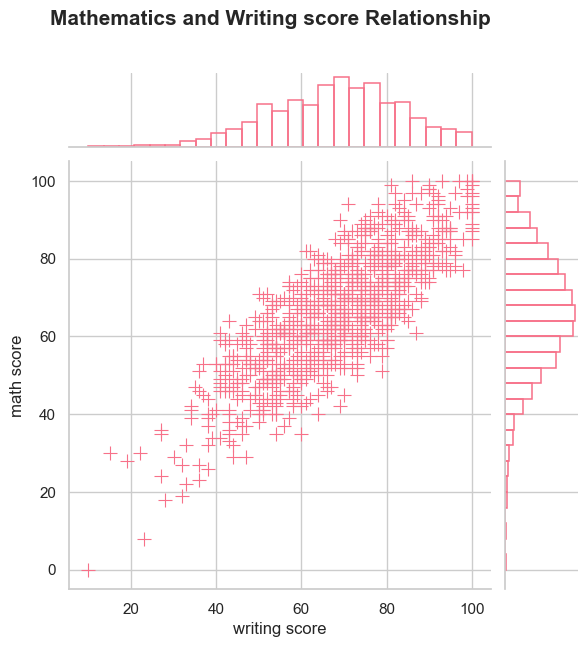

In [56]:
sns.set_palette("husl", 9)
sns.jointplot(
    data=df, x="writing score", y="math score",
    marker="+", s=100, marginal_kws=dict(bins=25, fill=False),
)
plt.title('Mathematics and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* Most students fall between the range of 40 to 85 marks in both the courses, mathematics and writing.

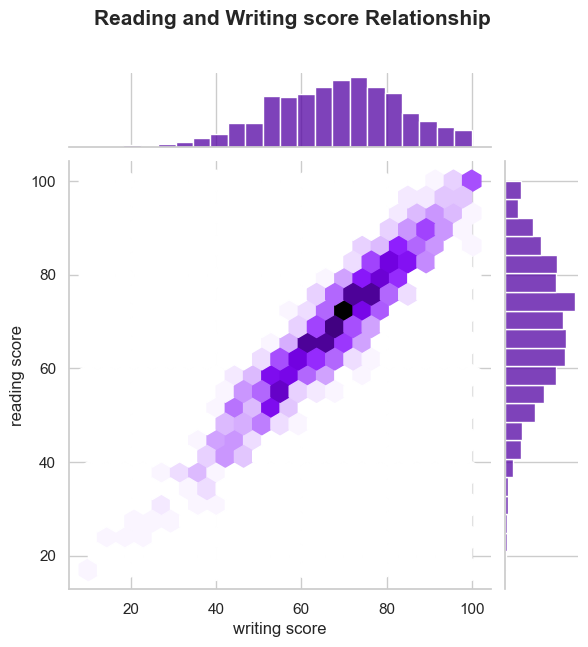

In [57]:
sns.set_palette("plasma")
sns.jointplot(data=df, x="writing score", y="reading score", kind="hex")
plt.title('Reading and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* The average score in both courses, reading and writing, is around 70.

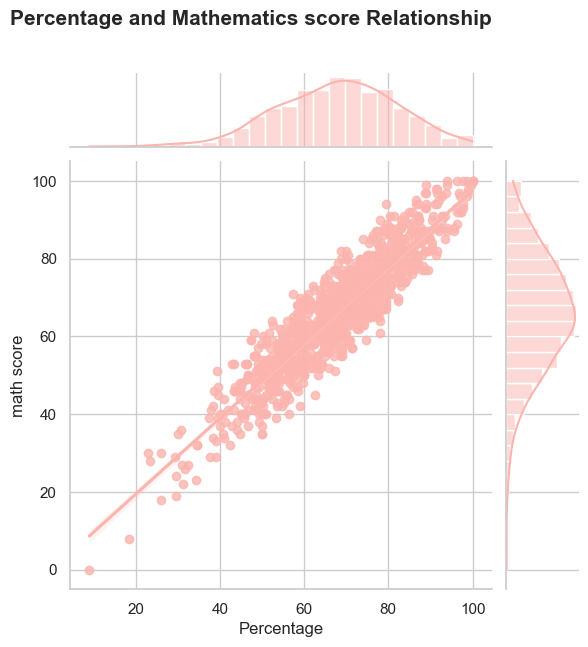

In [58]:
sns.set_palette("Pastel1")
sns.jointplot(data=df, x="Percentage", y="math score", kind="reg")
plt.title('Percentage and Mathematics score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* We can find that in the relationship between the percentage and the mathematics score, most student have scored in the range of 50 to 80.

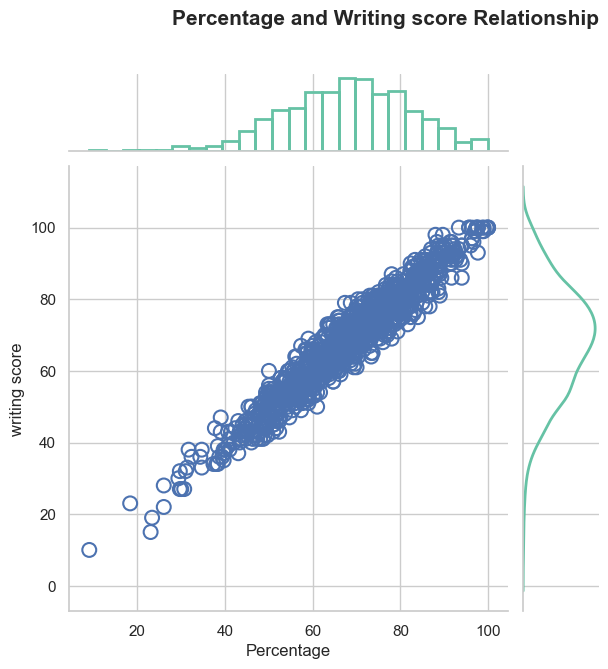

In [59]:
sns.set_palette("Set2")
g = sns.JointGrid()
x, y = df["Percentage"], df["writing score"]
sns.scatterplot(x=x, y=y, ec="b", fc="none", s=100, linewidth=1.5, ax=g.ax_joint)
sns.histplot(x=x, fill=False, linewidth=2, ax=g.ax_marg_x)
sns.kdeplot(y=y, linewidth=2, ax=g.ax_marg_y)
plt.title('Percentage and Writing score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* From the above visualization, we infer that most student have scored in the range of 60 to 80 which is constituting to the overall percentage as well.

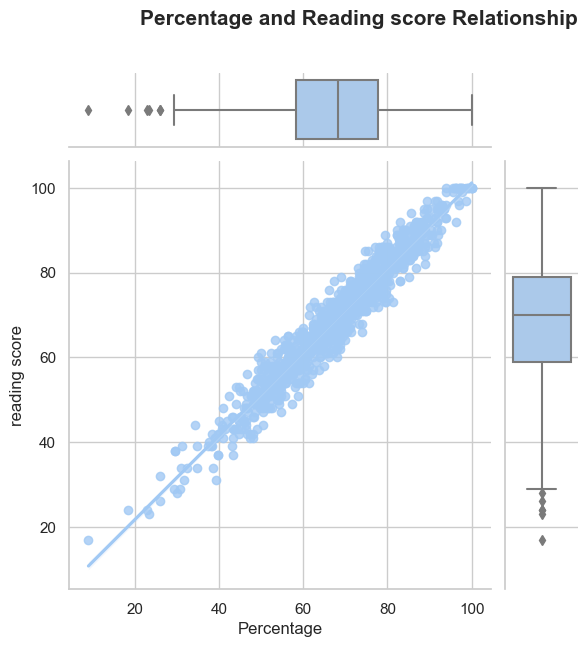

In [60]:
sns.set_context("notebook")
sns.set_palette("pastel")
g = sns.JointGrid(data=df, x="Percentage", y="reading score")
g.plot(sns.regplot, sns.boxplot)
plt.title('Percentage and Reading score Relationship', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

* We can conclude that most students have a good reading score, except a few.

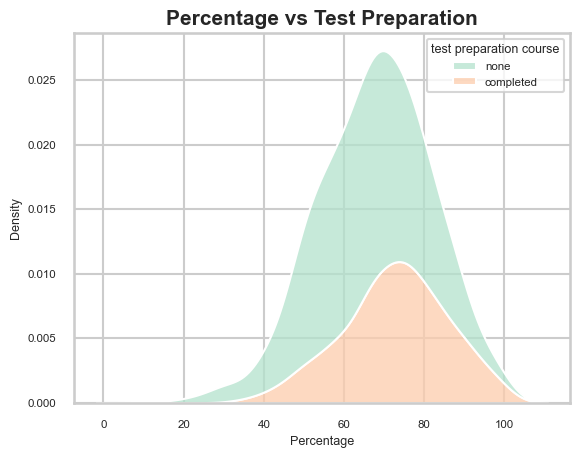

In [61]:
sns.set_context("talk",font_scale=0.5)
sns.set_palette("Pastel2")
sns.kdeplot(data=df, x="Percentage", hue="test preparation course", multiple="stack")
plt.title('Percentage vs Test Preparation',fontsize=15, fontweight='bold')

plt.show()

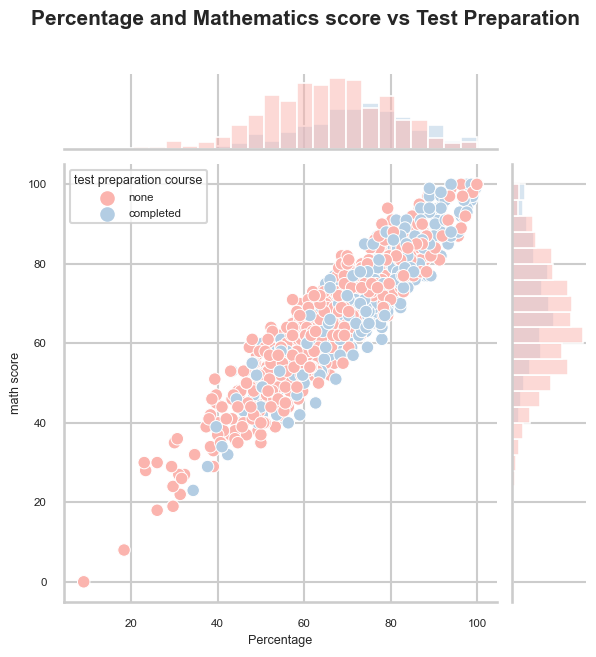

In [62]:
sns.set_palette("Pastel1")
g = sns.JointGrid(data=df, x="Percentage", y="math score", hue="test preparation course")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Mathematics score vs Test Preparation ', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

From the above visualization we can infer that :
* Students who have completed their test preparations have definitely scored better. 
* While a few students who did not complete their test preparations have not performed so well.

* We can notice that there are few who have scored exceptionally good compared to others even when they did not complete their test perparation.

* Also, there are very few who completed their test preparation but still scored low percentage.

(We always have few exceptions.)

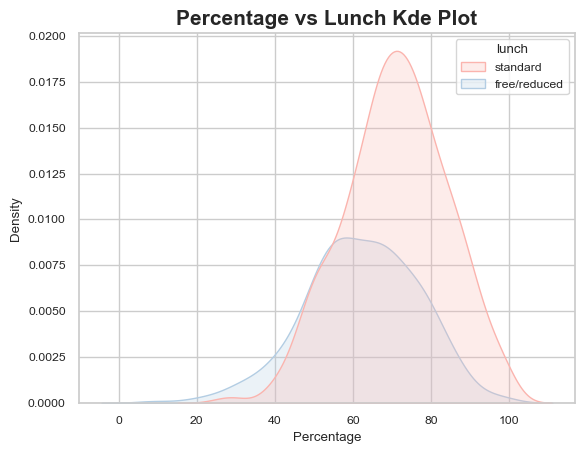

In [64]:
sns.set_context("notebook",font_scale=0.8)
sns.kdeplot(data=df, x="Percentage", hue="lunch", multiple="layer",fill=True)
plt.xlabel('Percentage')
plt.title('Percentage vs Lunch Kde Plot',fontsize=15, fontweight='bold')

plt.show()

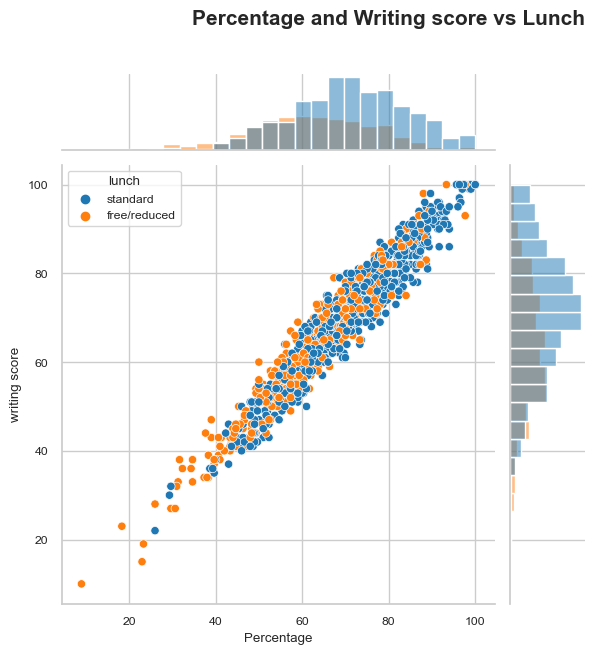

In [65]:
sns.set_palette("tab10")
g = sns.JointGrid(data=df, x="Percentage", y="writing score", hue="lunch")
g.plot(sns.scatterplot, sns.histplot)
plt.title('Percentage and Writing score vs Lunch', fontsize=15, fontweight='bold',y=1.3,loc="right")
plt.show()

Notice the range  75 to 100 in the above visualization.
* Students who had the standard lunch have performed very well.
* Students who had the free/reduced lunch have not performed so well.

It is very evident that food and nutriention play a vital role in the growth of a student both, physically and academically. Nutrition plays a key role in the healthy development of the children. Nutritious foods provide the body and mind with the energy needed to grow, feel well, be active, stay healthy and learn. Students are able to learn better when they're well nourished, and eating healthy meals has been linked to higher grades, better memory and alertness, and faster information processing.

Healthy students are better learners. 

In [66]:
df[(df['race/ethnicity']=='group B')]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
...,...,...,...,...,...,...,...,...,...,...
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,B
976,male,group B,some college,free/reduced,completed,60,62,60,60.666667,D
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,F
982,male,group B,some high school,standard,completed,79,85,86,83.333333,A


In [67]:
df["grade"].value_counts()

C    258
B    255
D    188
A    157
E     86
F     34
O     22
Name: grade, dtype: int64

In [68]:
df["grade"].index.sort_values()

RangeIndex(start=0, stop=1000, step=1)

In [69]:
df[df['grade']=='F'].groupby('gender').count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
gender,,,,,,,,,
female,18,18,18,18,18,18,18,18,18
male,16,16,16,16,16,16,16,16,16


In [70]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

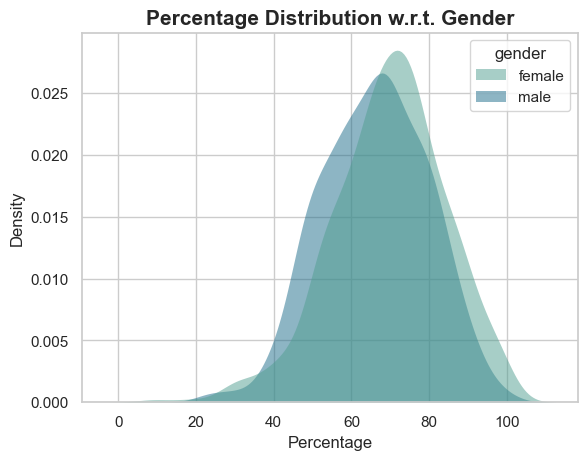

In [71]:
sns.set_context("notebook",font_scale=1)

sns.kdeplot(
   data=df, x="Percentage", hue="gender",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Percentage Distribution w.r.t. Gender',fontsize=15, fontweight='bold')

plt.show()

From the visualization above, it is quite evident that the female students have performed exceptionally well!

In [72]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'Percentage', 'grade'],
      dtype='object')

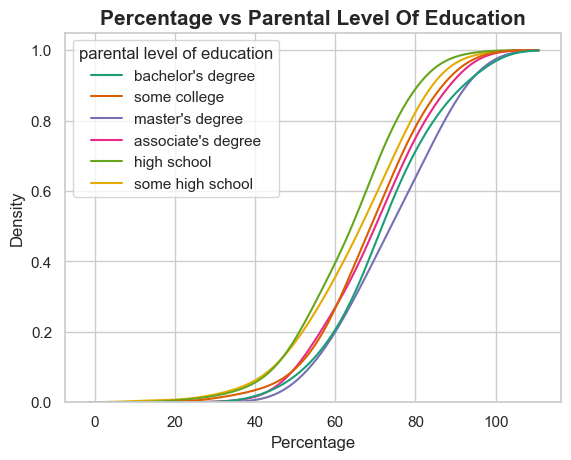

In [73]:
sns.set_palette("Dark2")
sns.set_context("notebook",font_scale=1)
sns.kdeplot(
    data=df, x="Percentage", hue="parental level of education",
    cumulative=True, common_norm=False, common_grid=True,
)
plt.title('Percentage vs Parental Level Of Education',fontsize=15, fontweight='bold')

plt.show()

* Students whose parents hold a master's degree have a higher overall percentage. 
* Students whose parental education level is 'high school' and 'some high school' have lower overall percentage.

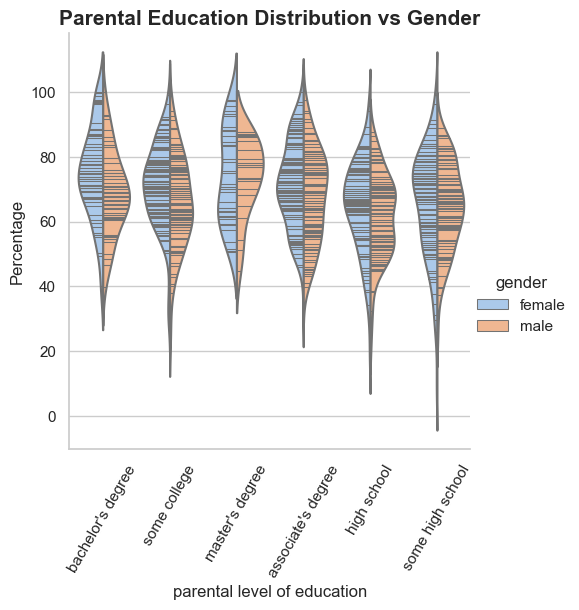

In [74]:
sns.catplot(x="parental level of education", y="Percentage", hue="gender",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df)
plt.title('Parental Education Distribution vs Gender',fontsize=15, fontweight='bold')
plt.xticks(rotation=60)
plt.show()

* Females whose parents hold a Bachelor's degree, followed by master's degree,are more successful.
* Males whose parents hold a Bachelor's degree and master's degree have similar academic performance

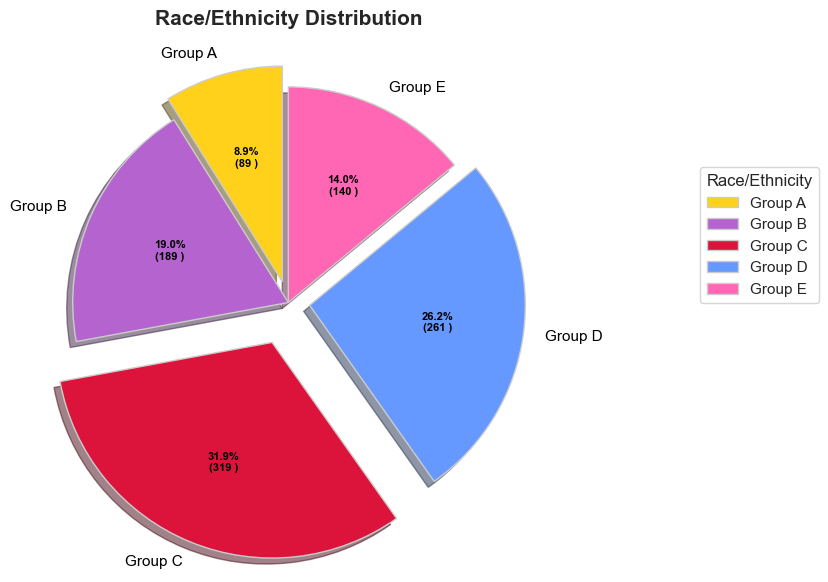

In [75]:
race = ['Group A', 'Group B ', 'Group C',  
        'Group D', 'Group E'] 
  
data = [89, 190, 319, 262, 140] 
  
  
# Creating explode data 
explode = ( 0.1, 0,0.2, 0.1, 0) 
  
# Creating color parameters 
colors = (  "#ffd11a", "#b463cf", 
          "#DC143C", "#6699ff", "#ff66b3" ) 
  
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "#cccccc" } 
  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} )".format(pct, absolute) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = race, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="#000000")) 
  
# Adding legend 
ax.legend(wedges, race, 
          title ="Race/Ethnicity", 
          loc ="center left", 
          bbox_to_anchor =(1.25, 0, 0, 1.25)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Race/Ethnicity Distribution", fontsize=15, fontweight='bold') 
  
# show plot 
plt.show()

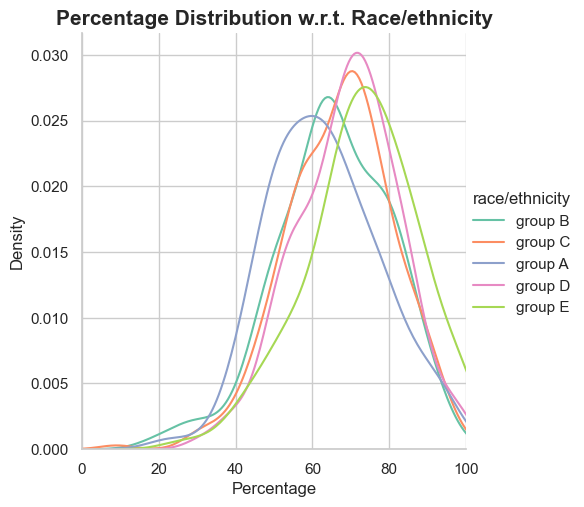

In [76]:
sns.set_palette("Set2")
(sns.FacetGrid(df,hue="race/ethnicity", height=5,xlim = (0,100)).map(sns.kdeplot, "Percentage").add_legend())
plt.title('Percentage Distribution w.r.t. Race/ethnicity',fontsize=15, fontweight='bold')

plt.show()

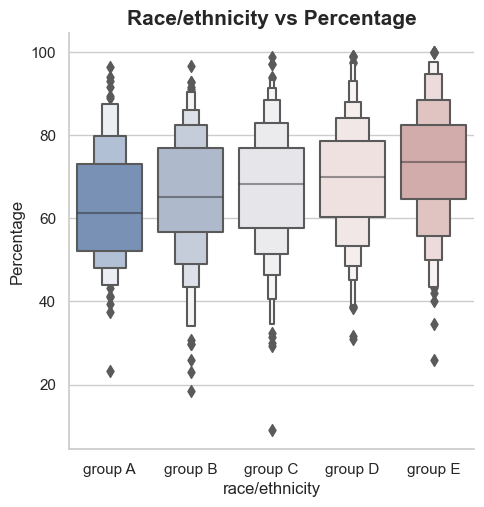

In [77]:
sns.set_palette("vlag")
sns.catplot(x="race/ethnicity", y="Percentage", kind="boxen",
            data=df.sort_values("race/ethnicity"))
plt.title('Race/ethnicity vs Percentage',fontsize=15, fontweight='bold')

plt.show()

* The average of group E is highest among all the groups while the average of group A is lowest.

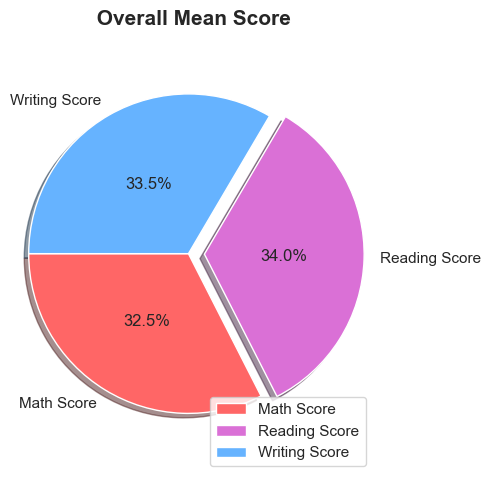

In [78]:
plt.figure(figsize=(5,5))
labels=['Math Score', 'Reading Score', 'Writing Score']
colors=['#ff6666','orchid','#66b3ff']
explode=[0,0.1,0]
values=[df["math score"].mean(),df["reading score"].mean(),df["writing score"].mean()]

plt.pie(values,labels=labels,colors=colors,explode=explode,autopct='%1.1f%%',shadow=True,startangle=180,pctdistance=0.5)
plt.legend(['Math Score', 'Reading Score', 'Writing Score'],loc='lower right')
plt.axis('equal')
plt.title(' Overall Mean Score  ',fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

* Reading Score has the highest average.

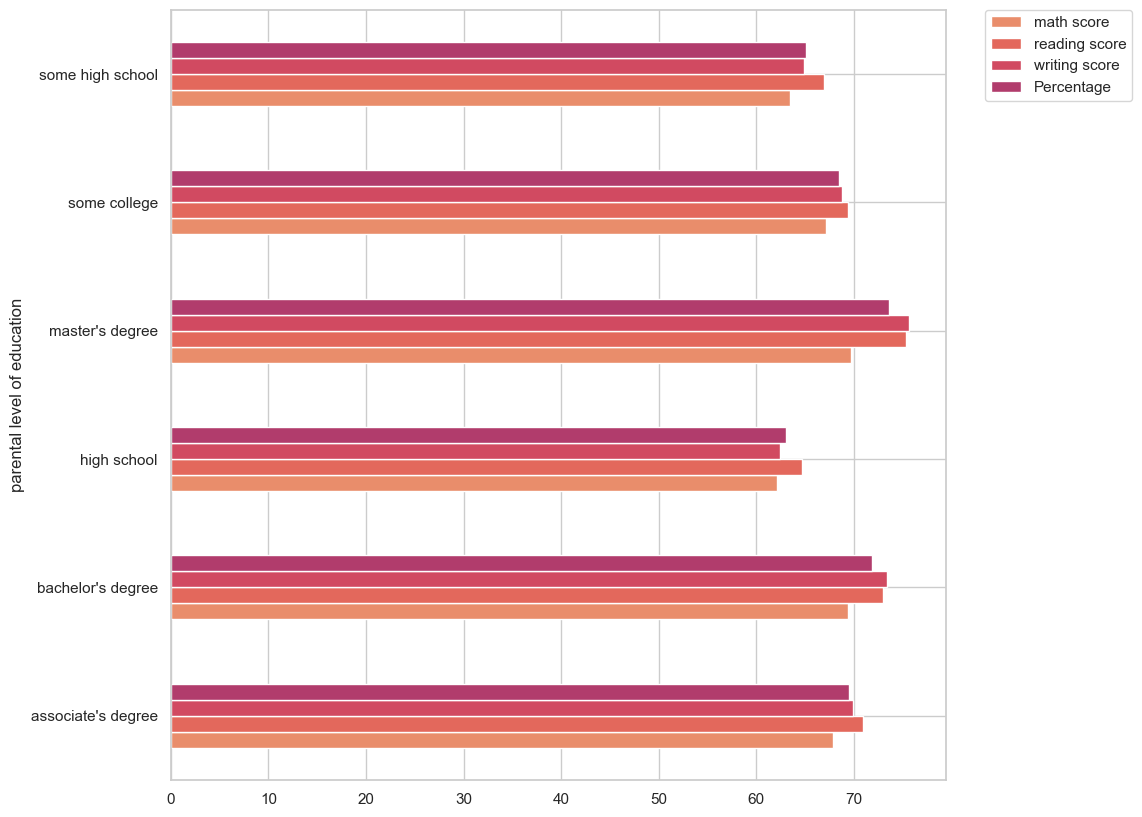

In [79]:
sns.set_palette("flare")
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

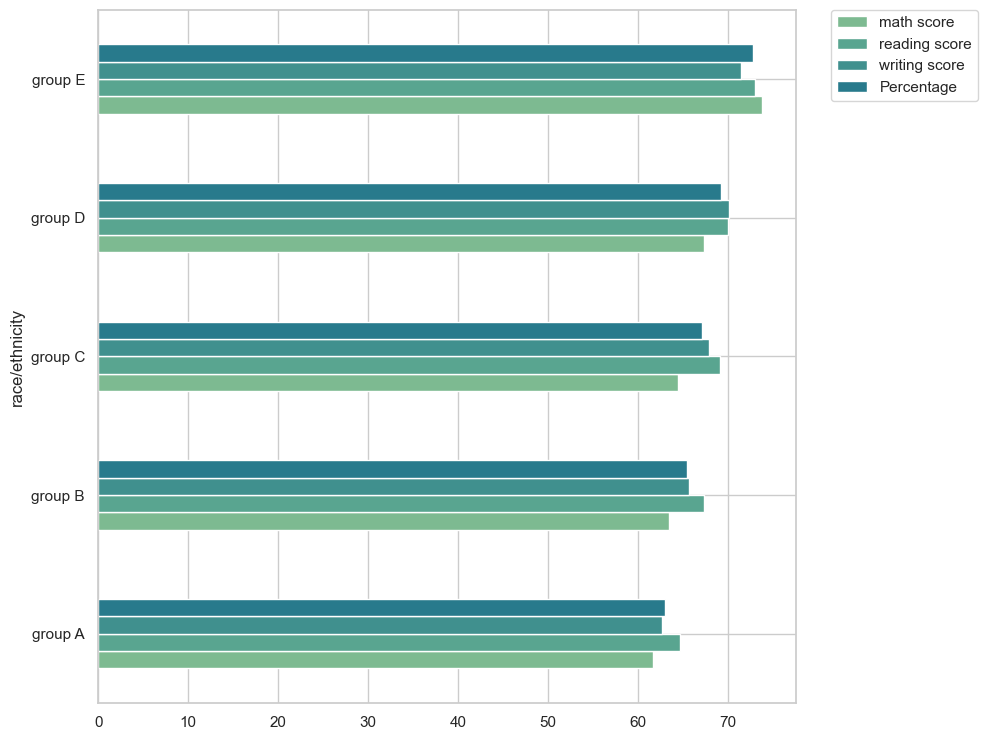

In [80]:
sns.set_palette("crest")
df.groupby('race/ethnicity').agg('mean').plot(kind='barh',figsize=(9,9))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

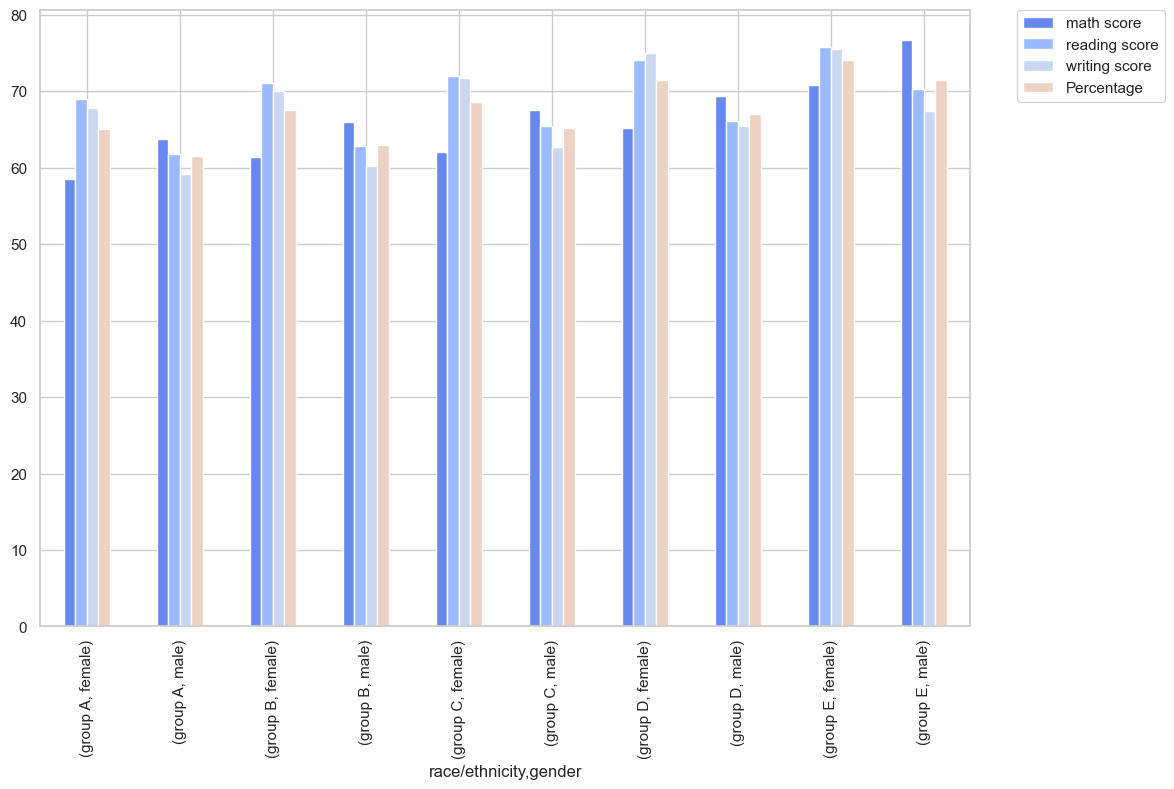

In [81]:
sns.set_palette("coolwarm")
df.groupby(['race/ethnicity','gender']).agg('mean').plot(kind='bar',figsize=(12,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# The End